In [3]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [4]:
df=yf.download('MSFT', start='2010-04-09',end='2020-04-30')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-09,29.950001,30.410000,29.900000,30.340000,23.926912,54752500
2010-04-12,30.250000,30.490000,30.209999,30.320000,23.911137,37068800
2010-04-13,30.150000,30.500000,30.129999,30.450001,24.013655,41374600
2010-04-14,30.790001,31.000000,30.660000,30.820000,24.305452,68941200
2010-04-15,30.820000,30.950001,30.709999,30.870001,24.344883,52745400


In [10]:
roll_mean=roll_mean= df['Open'].rolling(window=5,center=False).mean()
roll_std= df['Open'].rolling(window=5,center=False).std()

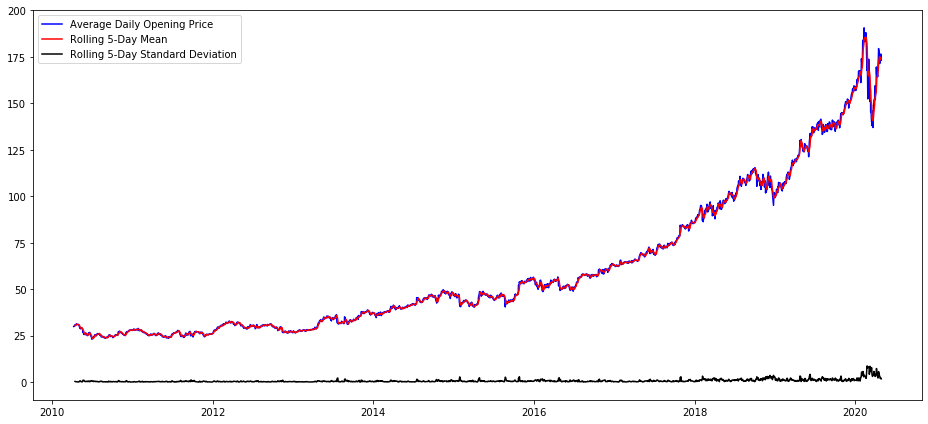

In [11]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df['Open'], color='blue',label='Average Daily Opening Price')
ax.plot(roll_mean, color='red', label='Rolling 5-Day Mean')
ax.plot(roll_std, color='black', label='Rolling 5-Day Standard Deviation')
ax.legend()
fig.tight_layout()

In [23]:
forecast_len=30
df['Predicted'] = df['Adj Close'].shift(-forecast_len)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Predicted
Date,,,,,,,
2020-04-23,174.110001,175.059998,170.910004,171.419998,171.419998,32790800,NaN
2020-04-24,172.059998,174.559998,170.710007,174.550003,174.550003,34305300,NaN
2020-04-27,176.589996,176.899994,173.300003,174.050003,174.050003,33194400,NaN
2020-04-28,175.589996,175.669998,169.389999,169.809998,169.809998,34392700,NaN
2020-04-29,173.220001,177.679993,171.880005,177.429993,177.429993,50872900,NaN


In [24]:
x=np.array(df.drop(['Predicted'],1))
#DataFlair - Remove last 30 rows
x=x[:-forecast_len]
print(x)

[[2.99500008e+01 3.04099998e+01 2.98999996e+01 3.03400002e+01
  2.39269123e+01 5.47525000e+07]
 [3.02500000e+01 3.04899998e+01 3.02099991e+01 3.03199997e+01
  2.39111366e+01 3.70688000e+07]
 [3.01499996e+01 3.05000000e+01 3.01299992e+01 3.04500008e+01
  2.40136547e+01 4.13746000e+07]
 ...
 [1.47500000e+02 1.61910004e+02 1.40729996e+02 1.58830002e+02
  1.58830002e+02 9.27274000e+07]
 [1.40000000e+02 1.49350006e+02 1.35000000e+02 1.35419998e+02
  1.35419998e+02 8.79059000e+07]
 [1.40000000e+02 1.47500000e+02 1.35000000e+02 1.46570007e+02
  1.46570007e+02 8.10598000e+07]]


In [25]:
y=np.array(df['Predicted'])
y=y[:-forecast_len]
print(y)

[ 21.2622242   20.81068802  20.6522541  ... 174.05000305 169.80999756
 177.42999268]


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1) 
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print(f"SVR Confidence: {round(svr_rbf_confidence*100,2)}%")

SVR Confidence: -0.26%


In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lr_confidence=lr.score(x_test,y_test)
print(f"Linear Regression Confidence: {round(lr_confidence*100,2)}%")

Linear Regression Confidence: 98.87%
